In [1]:
# This is a sample Python script.
import matplotlib.pyplot as plt
import pickle
# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.
from Sender import *
from Receiver import *

import sounddevice as sd
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile

# Press the green button in the gutter to run the script.


sender = Sender(1000, 10000)
sender.load_image('data/1_20_Imagen1.png')
audio = sender.send_image()
#wavfile.write('audio3.wav', 44100,audio)
sender.playText(audio)
#wavfile.write('audio3.wav', 44100,audio)


# receiver = Receiver(600, 800)
# audio = receiver.listen(60)
# wavfile.write("audio2.wav", 44100, audio)
# print("Done listening")

# fs, audio = wavfile.read("audio1.wav")

# audio = audio[44100:]

# # Normalize signal

# audio = audio/np.max(np.abs(audio))
# audio = audio - np.mean(audio)

# # Plot signal

# plt.plot(audio)
# plt.show()

# # Demodulate signal




In [2]:
freq,audio_wav =  wavfile.read('audio1.wav',44100)

In [3]:
from scipy.fftpack import fft,fftfreq

In [4]:
l = len(audio_wav)//4

In [5]:
fft_audio = fft(audio_wav)

In [6]:
freqs = fftfreq(len(fft_audio),1/freq)

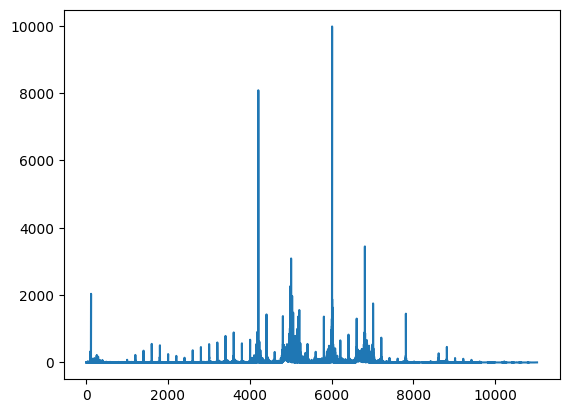

In [7]:
plt.plot(freqs[0:l],np.abs(fft_audio)[0:l])

In [8]:
audio_wav_fix = audio_wav

In [9]:
audio_wav.shape

(1102500,)

In [2]:
receiver = Receiver(1000, 10000)

In [4]:
audio_listen = receiver.listen(35)

Listening
Done listening


In [5]:
audio_listen_reshaped = audio_listen.reshape(-1)

In [7]:
bits = receiver.decode_image(audio_listen_reshaped,20)

81570
1417830


In [8]:
bits.shape

(20, 20, 3)

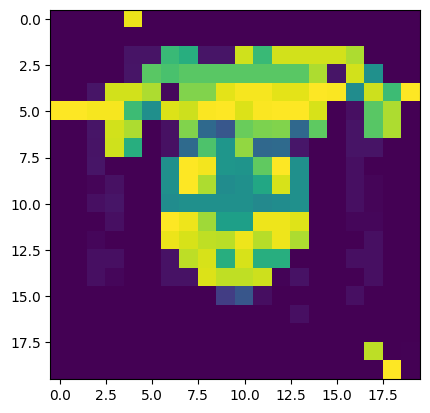

In [9]:
plt.imshow(bits[:,:,2])

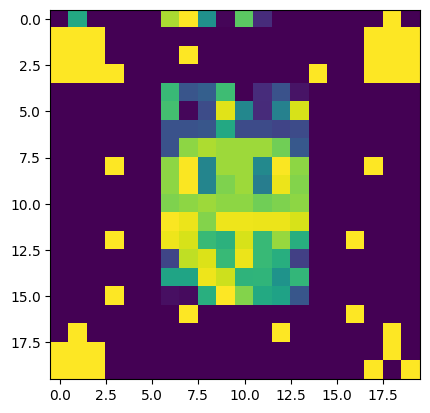

In [10]:
plt.imshow(bits[:,:,0])

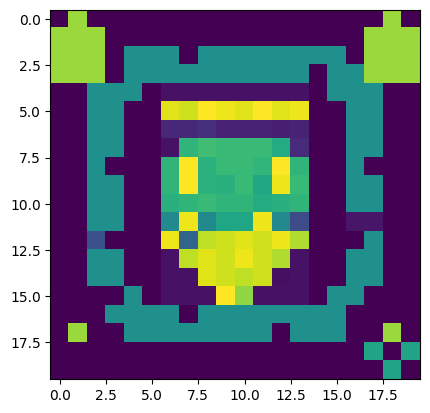

In [11]:
plt.imshow(bits[:,:,1])

In [12]:
bits = bits.astype(int)

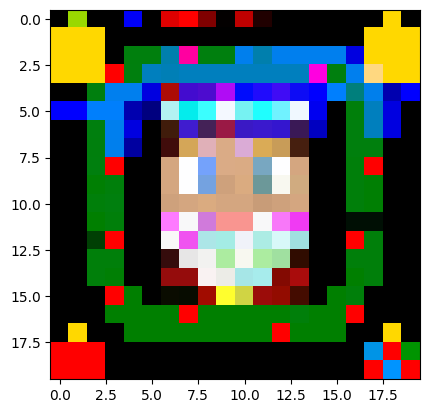

In [13]:
plt.imshow(bits, cmap='gray')

In [23]:
img = cv2.imread('data/1_20_Imagen1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [24]:
red = img[:,:,2]
green = img[:,:,1]
blue = img[:,:,0]

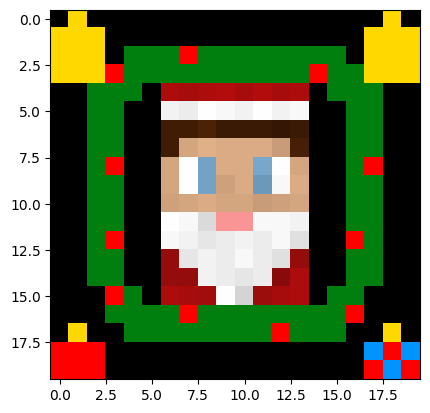

In [25]:
plt.imshow(img)

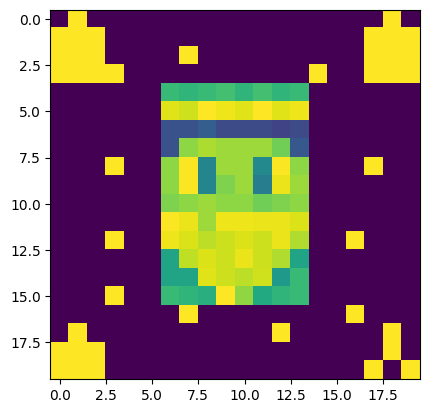

In [17]:
plt.imshow(red)


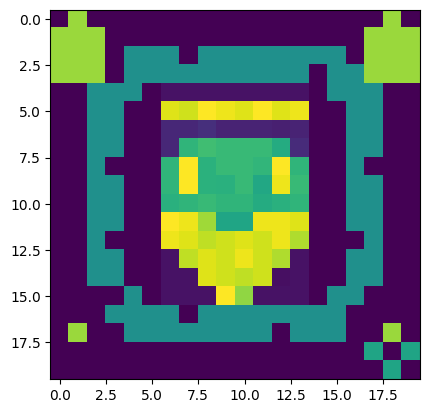

In [18]:
plt.imshow(green)

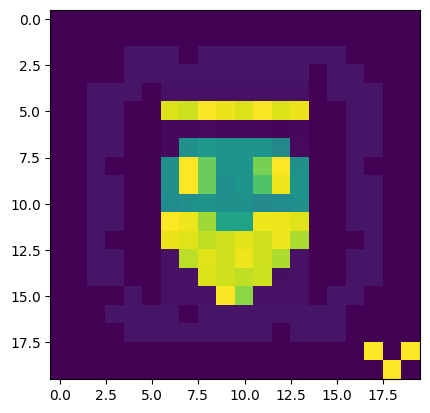

In [19]:
plt.imshow(blue)

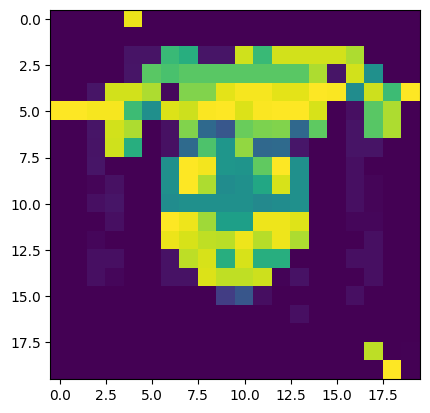

In [20]:
plt.imshow(bits[:,:,2])